In [3]:
import pandas as pd
import shutil
from os import listdir, mkdir, path
from pathlib import Path
import sys
from email.parser import HeaderParser
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from collections import Counter

In [10]:
parser = HeaderParser()
columns = ['received1',
'received2',
'received3',
'received4',
'received5',
'received6',
'received7',
'received8',
'received9',
'received10',
'received11',
'hops',
'subject',
'date',
'message-id',
'from',
'return-path',
'to',
'content-type',
'mime-version',
'x-mailer',
'content-transfer-encoding',
'x-mimeole',
'x-priority',
'list-id',
'lines',
'x-virus-scanned',
'status',
'content-length',
'precedence',
'delivered-to',
'list-unsubscribe',
'list-subscribe',
'list-post',
'list-help',
'x-msmail-priority',
'x-spam-status',
'sender',
'errors-to',
'x-beenthere',
'list-archive',
'reply-to',
'x-mailman-version',
'x-miltered',
'x-uuid',
'x-virus-status',
'x-spam-level',
'x-spam-checker-version',
'references',
'in-reply-to',
'user-agent',
'thread-index',
'cc',
'received-spf',
'x-original-to',
'content-disposition',
'mailing-list',
'x-spam-check-by',
'domainkey-signature',
'importance',
'x-mailing-list',
'label']

# List to store row dictionaries for headers
list_of_rows = []
# List to store email bodies
list_of_bodies = []
# Set to store seen emails
seen_emails = set()

def addEmailsToDict(email_list):
    global parser, list_of_rows, list_of_bodies
    
    # The label for phishing, set to '1'
    label = 1
    

    # Read the full email content
    for email in email_list:
        row_dict = {}
        
        # Parse the email content
        h = parser.parsestr(email)

        # Parse recieved field
        received_list = h.get_all('received')
        hops = 0
        if received_list is not None:
            hops = len(received_list)
            col_name_recieved = 'received'

            for inx, received_field in enumerate(received_list):
                col = col_name_recieved + str(inx+1)
                row_dict[col] = received_field


        # Make everything lowercase to avoid issues
        features_lower_case = [x.lower() for x in h.keys()]

        # Parse everything else
        new_row = dict(zip(features_lower_case, h.values()))
        new_row['hops'] = hops

        # Extract and store the email body
        body = h.get_payload()

        # Create a unique identifier for the email (headers + body)
        email_identifier = (tuple(new_row.items()), body)

        # Check if the email is unique
        if email_identifier not in seen_emails:
            seen_emails.add(email_identifier)
            list_of_bodies.append({'email_body': body, 'label': label})

            for key, value in new_row.items():
                if key in columns:
                    row_dict['label'] = label
                    row_dict[key] = value

            list_of_rows.append(row_dict)
        else:
            print('Duplicate email found!')

def process_file(file_path, split=False):
    global list_of_rows, list_of_bodies
    
    emailStr = ''
    try:
        with open(file_path, encoding='latin_1') as emailFile:
            for line in emailFile:
                emailStr += line
    except UnicodeDecodeError:
        print(f'Unicode Error in file {file_path}!')
    
    if split:
        email_list = emailStr.split('\nFrom jose@monkey.org')
    else:
        email_list = [emailStr]
    addEmailsToDict(email_list)

def main():
    jose_directory_path = '../Data/JosePhishingEmails/data'  # Directory containing the .txt files
    jose_extracted_path = '../Data/JosePhishingEmails/extracted/'  # Directory to store the extracted data

    real_directory_path = '../Data/EmailsHeaders/data'  # Directory containing the .txt files
    real_extracted_path = '../Data/EmailsHeaders/extracted/'  # Directory to store the extracted data
    
    # JOSE PHISHING EMAILS
    # Iterate over all .txt files in the directory
    for filename in listdir(jose_directory_path):
        if filename.endswith('.txt'):
            file_path = path.join(jose_directory_path, filename)
            process_file(file_path, split=True)

    # Headers DataFrame
    df_headers = pd.DataFrame(list_of_rows)
    final_columns = [col for col in columns if col in df_headers.columns]
    df_headers = df_headers[final_columns]
    df_headers.to_csv(jose_extracted_path + "extracted_headers.csv", index=False)

    # Bodies DataFrame
    df_bodies = pd.DataFrame(list_of_bodies)
    df_bodies.to_csv(jose_extracted_path + "extracted_bodies.csv", index=False)

    # REAL EMAILS
    list_of_rows.clear()
    list_of_bodies.clear()

    # Iterate over all .eml files in the directory
    for filename in listdir(real_directory_path):
        if filename.endswith('.eml'):
            file_path = path.join(real_directory_path, filename)
            process_file(file_path)

    # Headers DataFrame
    df_headers = pd.DataFrame(list_of_rows)
    final_columns = [col for col in columns if col in df_headers.columns]
    df_headers = df_headers[final_columns]
    df_headers.to_csv(real_extracted_path + "extracted_headers.csv", index=False)

    # Bodies DataFrame
    df_bodies = pd.DataFrame(list_of_bodies)
    df_bodies.to_csv(real_extracted_path + "extracted_bodies.csv", index=False)
    

if __name__ == '__main__':
    main()

Duplicate email found!


## The most common header fields

('from', 2544)
('subject', 2543)
('status', 2541)
('return-path', 2538)
('delivered-to', 2538)
('x-fda', 2538)
('x-he-tag', 2538)
('received', 2538)
('x-status', 2535)
('x-keywords', 2535)
('x-uid', 2535)
('content-type', 2534)
('mime-version', 2520)
('date', 2489)
('to', 2439)
('message-id', 2196)
('x-spam-summary', 1613)
('x-filterd-recvd-size', 1590)
('authentication-results', 1208)
('x-spam-status', 988)
('x-rspamd-queue-id', 947)
('x-rspamd-server', 947)
('x-stat-signature', 945)
('dkim-signature', 907)
('content-transfer-encoding', 872)
('x-rspam-user', 845)
('arc-seal', 788)
('arc-message-signature', 788)
('arc-authentication-results', 788)
('x-he-meta', 620)
('reply-to', 393)
('x-antiabuse', 362)
('x-authenticated-sender', 360)
('x-get-message-sender-via', 354)
('x-source', 297)
('x-source-args', 297)
('x-source-dir', 297)
('x-originating-ip', 218)
('x-priority', 212)
('thread-index', 201)
('thread-topic', 197)
('x-virus-scanned', 191)
('x-mailer', 189)
('content-language', 176

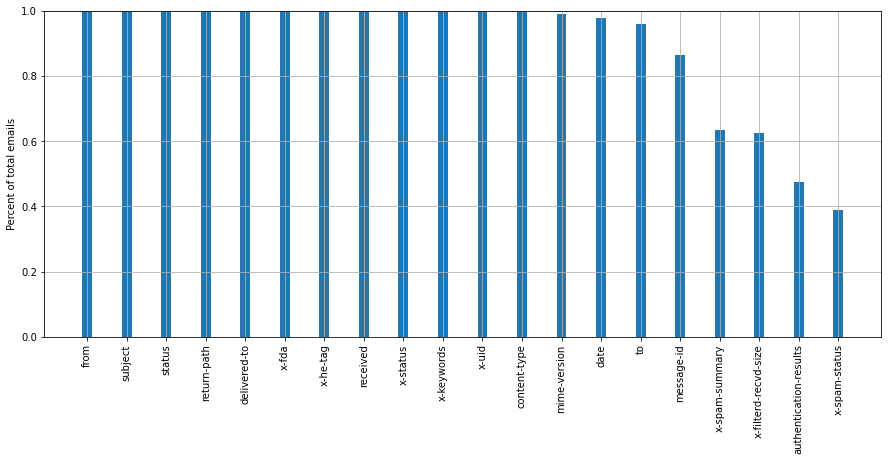

In [ ]:
parser = HeaderParser()
dict_header_features = {}
total_emails = 0


def addEmailsToDict(email_list):
    global parser, dict_header_features, total_emails
    
    # Read the full email content
    for email in email_list:
        
        total_emails += 1
        h = parser.parsestr(email)
        features_lower_case = [x.lower() for x in h.keys()]
        features_dict = Counter(features_lower_case)

        for k,v in features_dict.items():
            if k in dict_header_features:
                dict_header_features[k] += 1
            else:
                dict_header_features[k] = 1

def main():
    global dict_header_features, total_emails
        
    file_path_list = ['../Data/JosePhishingEmails/data/phishing2015.txt', '../Data/JosePhishingEmails/data/phishing2016.txt',            '../Data/JosePhishingEmails/data/phishing2017.txt', '../Data/JosePhishingEmails/data/phishing2018.txt',
                     '../Data/JosePhishingEmails/data/phishing2019.txt', '../Data/JosePhishingEmails/data/phishing2020.txt',
                     '../Data/JosePhishingEmails/data/phishing2021.txt', '../Data/JosePhishingEmails/data/phishing2022.txt',
                     '../Data/JosePhishingEmails/data/phishing2023.txt', '../Data/JosePhishingEmails/data/phishing2024.txt']
    
    for file_path in file_path_list:
        # Read the full email content
        emailStr = ''
        try:
            with open(file_path, encoding='latin_1') as emailFile:
                for line in emailFile:
                    emailStr += line
        except UnicodeDecodeError:
            print('Unicode Error!')

        email_list = emailStr.split('\nFrom jose@monkey.org')
        #print(email_list[1])

        addEmailsToDict(email_list)
        
    dict_header_features = sorted(dict_header_features.items(), key=lambda x:x[1], reverse=True)

    for v in dict_header_features:
        print(v)
        
    unzipped = list(zip(*dict_header_features))
    lab = unzipped[0]
    val = unzipped[1]
    print("TOTAL EMAIL COUNT:", total_emails)
    val = [x/total_emails for x in val]
    figure(figsize=(15, 6))
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.xticks(rotation='vertical')
    plt.ylabel('Percent of total emails')
    plt.bar(lab[0:20], val[0:20], width=0.25)
    plt.grid()
    plt.savefig('most_common_header_features_phish.png', bbox_inches="tight")
    plt.show()

if __name__ == '__main__':
    main()